In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Synthesized Queries - Intents Verified - Stage 1 - Sheet1.csv")

In [ ]:
df.head()

,Text,Intent,Sentiment (not verified yet),Assignee,INTENT Verified / Corrected (Mark as Yes),Verified / Corrected by,Remarks
0,"Hello, I hope this message finds you well. I a...",Customer Support,neutral,Aditi,Yes,Aditi,Sentiment changed from positive to neutral
1,"Hi, I'm a customer with a query regarding SkyW...",Passenger Services,neutral,Aditi,Yes,Aditi,NaN
2,"Hello, I am a customer looking for information...",Flight Operations,neutral,Aditi,Yes,Aditi,Sentiment changed from positive to neutral
3,"Hello, I have a question about SkyWings airlin...",Flight Operations,neutral,Aditi,Yes,Aditi,Sentiment changed from negative to neutral
4,I recently booked a flight with SkyWings for a...,"Booking, Modifications and Cancellations",positive,Aditi,Yes,Aditi,Sentiment changed from negative to positive


In [ ]:
# Step 1: Retain only 'Text' and 'Intent' columns
df = df[['Text', 'Intent']]

df.head()

,Text,Intent
0,"Hello, I hope this message finds you well. I a...",Customer Support
1,"Hi, I'm a customer with a query regarding SkyW...",Passenger Services
2,"Hello, I am a customer looking for information...",Flight Operations
3,"Hello, I have a question about SkyWings airlin...",Flight Operations
4,I recently booked a flight with SkyWings for a...,"Booking, Modifications and Cancellations"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1366 non-null   object
 1   Intent  1366 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


In [ ]:
# Capitalize first letter of every intent
df['Intent'] = df['Intent'].str.capitalize()

📊 Intent Class Distribution:

                                          Count  Percentage
Intent                                                     
Travel documents                            214       15.67
Customer support                            137       10.03
Flight operations                           123        9.00
Refunds                                     122        8.93
Baggage                                     118        8.64
Passenger services                          118        8.64
Check-in and boarding                       118        8.64
Other                                       110        8.05
Booking, modifications and cancellations    106        7.76
Loyalty and rewards                         105        7.69
Irrelevant                                   88        6.44
Fares and payments                            7        0.51


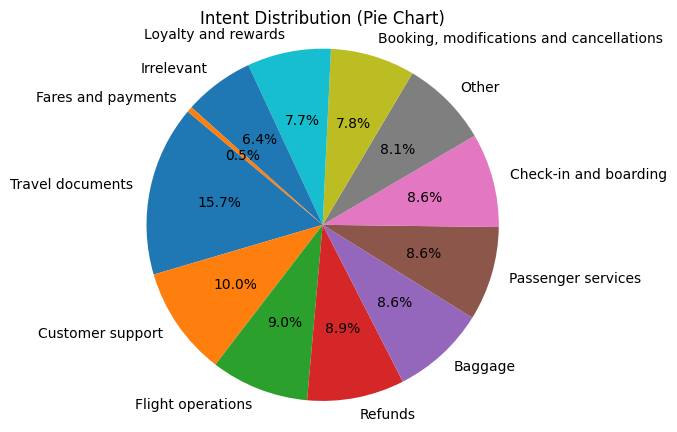

In [ ]:
# Check class counts
intent_counts = df['Intent'].value_counts()

# Calculate percentage distribution
intent_percent = df['Intent'].value_counts(normalize=True) * 100

# Display count and percentage together
distribution_df = pd.DataFrame({
    'Count': intent_counts,
    'Percentage': intent_percent.round(2)
})

print("📊 Intent Class Distribution:\n")
print(distribution_df)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Intent Distribution (Pie Chart)')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()


In [ ]:
# Get value counts directly from the dataset
intent_counts = df['Intent'].value_counts().to_dict()

# Set target per intent (e.g., 135)
target = 135

# Create intent distribution table
intent_df = pd.DataFrame.from_dict(intent_counts, orient='index', columns=['Current'])
intent_df['To_Generate'] = intent_df['Current'].apply(lambda x: target - x if x < target else 0)
intent_df['To_Drop'] = intent_df['Current'].apply(lambda x: x - target if x > target else 0)
intent_df['Final'] = target

# Sorting and formatting
intent_df.index.name = 'Intent'
intent_df = intent_df.sort_values(by='Current', ascending=False)

# Print
print(f"📊 Intent Balancing Plan (Target = {target} records per intent):\n")
print(intent_df)

📊 Intent Balancing Plan (Target = 135 records per intent):

                                          Current  To_Generate  To_Drop  Final
Intent                                                                        
Travel documents                              214            0       79    135
Customer support                              137            0        2    135
Flight operations                             123           12        0    135
Refunds                                       122           13        0    135
Baggage                                       118           17        0    135
Passenger services                            118           17        0    135
Check-in and boarding                         118           17        0    135
Other                                         110           25        0    135
Booking, modifications and cancellations      106           29        0    135
Loyalty and rewards                           105           30        0

In [ ]:
!pip install transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the Phi-2 model from Hugging Face
model_name = "microsoft/phi-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

# Move model to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (dense): Linear(in_features=2560, out_features=2560, bias=True)
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (rotary_emb): PhiRotaryEmbedding()
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (final_layernorm): LayerNorm((2560,), eps=1

In [ ]:
import random
import pandas as pd

def generate_query(intent, sentiment, max_new_tokens=100):
    prompt = random.choice(prompt_templates).format(intent=intent, sentiment=sentiment)

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    output = model.generate(
        **inputs,
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        max_new_tokens=max_new_tokens
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

def get_csv(intent, queries_per_sentiment):
    data = []
    sentiments = ["positive", "negative", "neutral"]

    for sentiment in sentiments:
        print(f"\n🔹 Generating {queries_per_sentiment} queries for '{intent}' with sentiment: '{sentiment}'")
        for i in range(1, queries_per_sentiment + 1):
            query = generate_query(intent, sentiment)
            data.append({"text": query, "intent": intent, "sentiment": sentiment})
            print(f"Query {i} ✅")

    df = pd.DataFrame(data)
    filename = f"{intent.replace(' ', '_')}_queries_stage2.csv"
    df.to_csv(filename, index=False)
    print(f"\n✅ All queries saved to '{filename}'")

In [ ]:
premise = "You are a user with a customer service query for SkyWings airline, which operates in India and offers only domestic flights."

fixed_instruction = (
    "Generate one complete, realistic customer service question. "
    "The question should reflect the way a typical customer would speak when contacting an airline, keeping in mind the cultural and conversational nuances common in India. "
    "Avoid explicitly mentioning you are from India, as it's already understood. "
    "The tone should be natural, human-like, and aligned with the specified sentiment, as if written by a real person seeking assistance."
)

In [ ]:
prompt_templates = [
    f"{premise} You're a customer inquiring about domestic flight fare policies. Your tone is {{sentiment}}. Write a question about domestic flight fares or pricing rules. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment asking about additional fees or charges related to a domestic flight booking. Make it sound like a real question. {fixed_instruction}",
    f"{premise} You're uncertain about how payments are processed for your domestic flight booking. Write a unique, human-like query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a traveler, you're asking about payment alerts or notifications related to your domestic flight booking. Ask a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to clarify the payment methods accepted for booking a domestic flight. Write a natural-sounding query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the baggage fees or charges associated with your domestic flight booking. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re confused about the fare differences based on ticket classes or seating options for domestic flights. Ask a human-like question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve encountered issues with payment processing during your domestic flight booking. Write a natural and distinct question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering if there are any promotional offers or discounts available for domestic flight bookings. Write a natural query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking about any changes in payment policies or additional charges for domestic flights. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking whether there are any service fees or hidden charges related to booking a domestic flight. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to check if your payment has been processed correctly for a domestic flight booking. Ask a unique, human-sounding question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about installment options or payment plans for booking a domestic flight. Write a query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're uncertain whether you can change the payment method after booking a domestic flight. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking about the payment options available for domestic flights. Write a clear, human-like question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer inquiring about the refund process for overcharged payments on domestic flights. Ask a realistic, emotionally matched question in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're looking for more details about any domestic flight-specific currency exchange fees or charges for payments. Write a query in a {{sentiment}} tone. {fixed_instruction}"
]

In [ ]:
get_csv("Fares and payments", 45)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 45 queries for 'Fares and payments' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅

🔹 Generating 45 queries for 'Fares and payments' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅

🔹 Generating 45 queries for 'Fares and payments' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅
Query 45 ✅

✅ All queries saved to 'Fares_and_payments_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're asking a question about the latest cricket match scores. Write a realistic, off-topic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a question from a user looking for restaurant recommendations in Bangalore. Keep the tone {{sentiment}}. {fixed_instruction}",
    f"{premise} You're trying to get advice on which mobile phone to buy. Ask a distinct, irrelevant question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user trying to troubleshoot their internet connection. Write a human-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about how to prepare for a government job exam. Use a {{sentiment}} tone and write a realistic but irrelevant query. {fixed_instruction}",
    f"{premise} You're wondering how to apply for a passport. Ask a natural-sounding question in a {{sentiment}} tone, unrelated to airlines. {fixed_instruction}",
    f"{premise} Simulate a user seeking movie recommendations. Write a casual, irrelevant question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking where to get a COVID-19 test in your city. Write an unrelated question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know the best time to visit Manali. Ask a question completely unrelated to airlines, using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're looking for tips on cooking biryani. Ask an off-topic but human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how to transfer money from one bank to another. Write a clearly irrelevant query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking how to renew their car insurance. Make it sound realistic but unrelated to aviation. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking about booking a hotel in Goa. Write a natural but irrelevant query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know how to get a visa for the USA. Write a realistic and unrelated question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking for a good yoga routine for beginners. Write an unrelated but human question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about the stock market trends. Make the query sound natural but irrelevant. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You want tips on maintaining indoor plants. Write a question that's clearly off-topic using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about how to bake a cake. Write an off-topic and realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user wondering what the capital of Australia is. Make it sound like a natural but irrelevant question. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're confused about a math problem. Ask a realistic, unrelated question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking for recommendations for budget laptops. Write an off-topic, natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking how to clean a microwave. Use a {{sentiment}} tone and make the question irrelevant to airlines. {fixed_instruction}",
    f"{premise} You're trying to understand how mutual funds work. Ask a distinct, off-topic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about how to start a podcast. Write a question unrelated to travel using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking which school is best for your child. Make the query realistic but not related to the airline. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a user wanting a tip on how to lose weight. Keep the tone {{sentiment}} and make the query irrelevant. {fixed_instruction}",
    f"{premise} You're asking how to get rid of mosquitoes at home. Write a realistic, off-topic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering how to connect your phone to a smart TV. Make it a human-sounding, unrelated question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the top trending Netflix shows. Write a clear irrelevant query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to decide what gift to buy for a friend's birthday. Ask a question not related to SkyWings using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious how to adopt a pet in your city. Ask an off-topic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about skincare routines. Make the query sound unrelated but human. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking how to fix a leaking tap. Make it realistic and clearly irrelevant to the airline. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You want to know about freelance job websites. Ask a practical but off-topic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering where to get the best momos in Delhi. Write a foodie-style irrelevant query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know how to cancel an Amazon order. Ask a non-airline, realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how to create a resume for freshers. Write a job-related but irrelevant query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking for tips on maintaining a bike. Make it a human-sounding and clearly off-topic query. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a user wondering how to build a PC. Keep the tone {{sentiment}} and ensure the query is irrelevant to travel. {fixed_instruction}",
    f"{premise} You’re asking about good weekend getaway spots near Mumbai. Write an off-topic and natural-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how to check your electricity bill online. Make it an everyday but irrelevant question. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a user asking how to use ChatGPT. Write a clearly off-topic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re trying to figure out which broadband plan to choose. Write an unrelated and practical question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how to play the guitar. Make the query feel natural but irrelevant to aviation. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking about local elections in your area. Write a civic-related but off-topic question using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about astrology predictions. Keep it casual, human-like, and clearly irrelevant. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're curious about how to file income tax online. Ask a financial but off-topic query in a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Irrelevant", 20)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 20 queries for 'Irrelevant' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅

🔹 Generating 20 queries for 'Irrelevant' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅

🔹 Generating 20 queries for 'Irrelevant' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅
Query 20 ✅

✅ All queries saved to 'Irrelevant_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a frequent flyer with SkyWings and want to understand their loyalty program. Ask a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious how to earn reward points while flying with SkyWings. Write a natural customer service query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're flying frequently with this Indian domestic airline and want to know how to join their rewards program. Ask a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to redeem your SkyWings reward points but don't know how. Write a distinct and realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You recently booked a flight and want to check if it qualifies for reward points. Ask a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether your recent flight earned you any reward points. Ask a customer service-style query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger wondering how long SkyWings reward points are valid. Ask the question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're planning a trip and want to know if you can use your SkyWings loyalty points to get a discount. Write a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to transfer your SkyWings reward points to a family member. Ask a distinct and realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re trying to understand the benefits of being a SkyWings loyalty member. Write a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're not sure if your SkyWings membership is still active. Ask a natural-sounding query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking whether they earn rewards on add-on services. Make it sound like a real customer query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You recently flew but forgot to enter your loyalty ID. Ask if you can still claim points in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to upgrade your seat using SkyWings loyalty points. Ask a natural question in a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Loyalty and rewards", 15)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 15 queries for 'Loyalty and rewards' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅

🔹 Generating 15 queries for 'Loyalty and rewards' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅

🔹 Generating 15 queries for 'Loyalty and rewards' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅
Query 15 ✅

✅ All queries saved to 'Loyalty_and_rewards_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You want to know how to modify your travel dates. Write a natural-sounding query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about cancellation fees for your flight. Write a unique, human-sounding query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re looking to cancel your booking but unsure how to proceed. Write a natural query using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about how to book a flight from one Indian city to another Indian city. You need help. Write a clear, human-like question with {{sentiment}} tone. {fixed_instruction}"

]

In [ ]:
get_csv("Booking, modifications and cancellations ", 15)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 15 queries for 'Booking, modifications and cancellations ' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅

🔹 Generating 15 queries for 'Booking, modifications and cancellations ' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅

🔹 Generating 15 queries for 'Booking, modifications and cancellations ' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅
Query 15 ✅

✅ All queries saved to 'Booking,_modifications_and_cancellations__queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're curious about SkyWings' environmental sustainability practices. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking if SkyWings offers any student travel benefits. Use a {{sentiment}} tone and make it sound human. {fixed_instruction}",
    f"{premise} You're wondering whether SkyWings has plans to expand to new cities. Write a distinct query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking about SkyWings’ policies related to weather disruptions. Write a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to understand how SkyWings handles customer privacy and data protection. Write a clear question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're interested in job opportunities with SkyWings. Ask a natural-sounding query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings offers any group booking discounts. Write a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure if pets are allowed on SkyWings flights. Ask a customer support-style question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking if SkyWings has in-flight entertainment. Use a {{sentiment}} tone and make it sound real. {fixed_instruction}",
    f"{premise} You're a frequent flyer wondering if SkyWings has any airport lounge tie-ups. Ask a distinct, human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if SkyWings offers any discounts for senior citizens. Write a natural customer inquiry with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to understand how SkyWings handles lost and found items at the airport. Ask a realistic support-style query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler wondering whether SkyWings is operating flights on national holidays. Write it in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure if SkyWings participates in any government travel schemes. Write a clear question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a passenger asking about travel insurance options available through SkyWings. Write a realistic, emotionally appropriate question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings allows photography during flights. Ask a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re curious whether SkyWings flights use biofuel or sustainable aviation fuel. Ask an environmentally-focused question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about SkyWings' corporate social responsibility initiatives. Write a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to understand how SkyWings trains its cabin crew. Ask a behind-the-scenes style question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a researcher asking how SkyWings contributes to regional air connectivity. Make the question sound curious and professional in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings has any collaborations with local tourism boards. Ask a partnership-related question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user interested in how SkyWings chooses new routes. Ask a business-strategy-oriented question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings supports carbon offset programs. Write a question from an eco-conscious traveler using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings supports regional artisans through its in-flight shopping. Ask a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings plans to introduce electric aircraft in the future. Ask an innovation-focused question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a student writing a report and want to know when SkyWings was founded. Write a fact-finding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about how SkyWings handles air traffic congestion during peak season. Ask a thoughtful operational question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings supports local job creation in the cities it operates. Make it sound realistic and polite in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how SkyWings ensures passenger safety during emergencies. Write a safety-related question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know if SkyWings uses AI in its customer service systems. Ask a tech-related question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about SkyWings' app features and whether it supports offline check-ins. Ask in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how SkyWings handles weather-related delays differently from other airlines. Write a comparison-style question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user interested in SkyWings' partnerships with other domestic carriers. Ask a query that sounds natural in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how SkyWings determines fare prices. Ask an economics-based but customer-style question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings provides air charter services. Write a specialized but natural-sounding question in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a blogger asking if SkyWings has a media partnership program. Ask in a natural tone that fits a {{sentiment}} emotion. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings provides any exclusive offers for defense personnel. Write a thoughtful query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a frequent traveler and want to know if SkyWings offers bundled city-hotel-flight packages. Ask the question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re curious whether SkyWings supports visually impaired travelers with tech tools. Make it sound genuine and in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how SkyWings ensures cleanliness between flights. Write a health-conscious question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings sells gift cards or travel vouchers. Write a customer-centric query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if SkyWings flights are pet-friendly and what kind of carriers are allowed. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering whether SkyWings supports local languages in its onboard announcements. Ask a cultural-sensitivity-related query in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about how SkyWings reduces in-flight waste. Write a sustainability-minded query in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a frequent business traveler asking if SkyWings offers early boarding for premium members. Ask naturally in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if SkyWings accepts digital wallets for onboard purchases. Write a tech-savvy question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings runs festive or seasonal promotions. Make the query engaging and friendly in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking if SkyWings provides any behind-the-scenes content about flight operations. Ask with curiosity in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious whether SkyWings has ever won any aviation awards. Ask a light, reputation-focused question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how SkyWings handles in-flight announcements for emergencies. Write a practical and concerned query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings offers workshops or sessions for aspiring pilots. Write an aviation-enthusiast-style query in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering whether SkyWings sponsors any sports teams or events. Ask in a casual, brand-aware tone with {{sentiment}}. {fixed_instruction}",
]

In [ ]:
get_csv("Other", 10)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 10 queries for 'Other' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅

🔹 Generating 10 queries for 'Other' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅

🔹 Generating 10 queries for 'Other' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅
Query 10 ✅

✅ All queries saved to 'Other_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a customer trying to understand the check-in process. Your tone is {{sentiment}}. Write a natural question about check-in. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about web check-in policies. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment inquiring about airport check-in procedures. Make it sound like a real question. {fixed_instruction}",
    f"{premise} You're flying with SkyWings and confused about check-in options. Write a distinct, human-like query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a traveler, you want clarity on when and how to check in. Ask a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether you should use web check-in or airport check-in. Ask a natural-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if your boarding pass will be valid if you do web check-in. Write a realistic query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking about check-in deadlines for SkyWings. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer with questions about the check-in counters. Write a natural and emotionally appropriate query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're checking in for a flight and need help. Write a human-like customer service query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a unique and realistic query about which terminal SkyWings operates from. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're flying soon and don't know where to go at the airport. Ask a distinct question about terminal info in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking whether they can check in with just their phone. Make the question sound human and use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're confused about the boarding gate process after check-in. Write a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Write a realistic query about how early one should arrive for airport check-in. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You’ve completed web check-in but are unsure about baggage drop. Ask a human-like question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether web check-in is available for your flight. Ask a unique, natural customer service query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger inquiring about documents needed at check-in. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're concerned about the check-in time window. Write a realistic, emotionally matched question in a {{sentiment}} tone. {fixed_instruction}"
]

In [ ]:
get_csv("Check-in and Boarding", 9)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 9 queries for 'Check-in and Boarding' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅

🔹 Generating 9 queries for 'Check-in and Boarding' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅

🔹 Generating 9 queries for 'Check-in and Boarding' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅
Query 9 ✅

✅ All queries saved to 'Check-in_and_Boarding_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a traveler with special needs flying on a domestic Indian airline, SkyWings. Ask a realistic question about available assistance. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer with mobility issues trying to understand how to request support from SkyWings. Write a natural query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're traveling with an infant and have questions about onboard facilities or seating. Write a human-like query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if baby strollers are allowed onboard or at the gate. Write a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic question from a pregnant passenger asking about travel guidelines with SkyWings. Make it sound human and use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about medical clearance or documentation required to travel with a health condition. Write a clear, human-sounding query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re planning to travel after surgery and want to check SkyWings' policy on medical fitness to fly. Ask a natural question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer inquiring if oxygen cylinders are allowed onboard for medical reasons. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a parent wondering if your unaccompanied child can fly on SkyWings. Ask a realistic and emotionally appropriate question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the age requirements and support available for unaccompanied minors on a SkyWings domestic flight. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about meal options or refreshments during a SkyWings flight. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're flying with SkyWings and want to know if onboard entertainment is available. Write a natural question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're interested in pre-booking meals or extra baggage. Ask a human-sounding query about SkyWings' add-on services using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler asking about Wi-Fi or charging ports availability onboard a domestic SkyWings flight. Make the question realistic and {{sentiment}}-toned. {fixed_instruction}",
    f"{premise} You're wondering how to request a wheelchair in advance for your SkyWings flight. Write a natural question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're booking a ticket for an elderly family member and need information about onboard support. Ask a realistic query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking if a caregiver can accompany a passenger with special needs. Write it in a human-like way using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're traveling with twins and want to check infant travel rules on SkyWings. Ask a distinct question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're concerned about flying in late pregnancy and want to confirm SkyWings' travel cutoffs. Write a natural query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether special medical conditions require approval before booking a flight. Ask a clear, emotionally relevant question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a vegetarian traveler flying with SkyWings. Ask a natural question about the availability of veg meal options onboard. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious whether you can pre-order a meal while booking your SkyWings flight. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're concerned about food allergies and want to know if SkyWings offers allergen-free meals. Write a clear and human-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're fasting for religious reasons and wondering if SkyWings provides appropriate meal accommodations. Ask a natural question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You forgot to select a meal while booking your flight and want to know if you can still get food onboard. Ask a realistic query in a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Passenger Services", 9)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 9 queries for 'Passenger Services' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅

🔹 Generating 9 queries for 'Passenger Services' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅

🔹 Generating 9 queries for 'Passenger Services' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅
Query 9 ✅

✅ All queries saved to 'Passenger_Services_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a customer reaching out to an airline. Your concern is baggage-related and your tone is {{sentiment}}. Write a natural, human-like question. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about baggage policies. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment inquiring about baggage rules or issues. Make it sound like a real question. {fixed_instruction}",
    f"{premise} Write a unique and natural airline customer query about baggage. The tone should reflect a {{sentiment}} attitude. {fixed_instruction}",
    f"{premise} You're a passenger unsure about baggage allowance. Ask a distinct, realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a customer, you want clarity on excess baggage. Write a natural and different-sounding question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about what kind of cabin baggage is allowed. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler asking about fees or rules for excess baggage. Make the question sound real and use {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Write a human-like query about carrying unusual or oversized items on a flight. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're confused about rules for dangerous goods in baggage. Write a natural query that reflects a {{sentiment}} attitude. {fixed_instruction}",
    f"{premise} You're a customer whose luggage didn't arrive. Ask a real, emotionally appropriate question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how to track your checked-in baggage. Write a natural airline customer service query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a question about transferring baggage between connecting flights. Keep it realistic and use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Write a distinct, realistic passenger inquiry about restricted items in luggage. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're unsure about musical instruments or sports gear as baggage. Ask a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic query about how many bags a passenger is allowed to carry. Make it sound natural with {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're a traveler asking whether you can bring a certain item in cabin baggage. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a customer question about lost or delayed baggage and next steps. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer preparing for a flight and have a baggage concern. Write a realistic and different query using {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're unsure whether your baggage will be automatically transferred. Ask a unique, human-like question with a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Baggage", 9)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 9 queries for 'Baggage' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅

🔹 Generating 9 queries for 'Baggage' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅

🔹 Generating 9 queries for 'Baggage' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅
Query 9 ✅

✅ All queries saved to 'Baggage_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're confused about how long it takes to receive a refund after cancelling your flight. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if the full amount will be refunded when you cancel a domestic flight. Write a human-like query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering whether the refund will be credited to your original mode of payment. Ask a distinct and realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler who cancelled their flight but hasn't received a refund. Write a concerned customer query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve received a cancellation confirmation but no refund update. Ask a question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're inquiring about refund timelines for domestic flights cancelled by the airline. Write a realistic, emotionally matched question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know whether refunds are processed automatically or require a request. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the refund process for a missed domestic flight. Write a realistic, human query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve cancelled your flight but got a message saying your refund is under process. Ask a natural question about the status in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer unsure about how to track the status of your refund. Write a natural-sounding query with a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Refunds", 8)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 8 queries for 'Refunds' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅

🔹 Generating 8 queries for 'Refunds' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅

🔹 Generating 8 queries for 'Refunds' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅
Query 8 ✅

✅ All queries saved to 'Refunds_queries_stage2.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a customer trying to check if a particular SkyWings flight is operating today. Remember, SkyWings is a domestic Indian airline. Ask a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger wondering whether flights between two Indian cities operate daily on SkyWings. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about flight timings for a domestic route within India. Write a clear, human-like question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic query from a traveler asking if SkyWings has non-stop flights between two Indian cities. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a passenger wondering why their SkyWings domestic flight is delayed. Ask a realistic, emotionally appropriate question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer who just got a delay notification and want more details about your domestic flight. Write a human-like query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Ask a natural-sounding question about the usual causes for delays on SkyWings domestic Indian flights. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking about the rescheduling process if a domestic flight is delayed. Use a {{sentiment}} tone and make it sound like a real customer concern. {fixed_instruction}",
    f"{premise} Simulate a traveler asking how much advance notice SkyWings provides about delays. Make the query about a domestic Indian route and write it in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure which aircraft operates on a particular domestic route in India. Ask a distinct question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Ask a realistic question about whether SkyWings uses different aircraft types for various Indian routes. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You want to confirm whether a certain route between Indian cities is currently operational. Write a human-sounding query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know if there are multiple flights per day between two Indian cities. Ask a realistic, emotionally matched question with a {{sentiment}} tone. {fixed_instruction}",
]


In [ ]:
get_csv("Flight Operations", 7)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 7 queries for 'Flight Operations' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅

🔹 Generating 7 queries for 'Flight Operations' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅

🔹 Generating 7 queries for 'Flight Operations' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅
Query 7 ✅

✅ All queries saved to 'Flight_Operations_queries_stage2.csv'


In [ ]:
import pandas as pd
import glob
import os

# Find all CSV files directly in /content/
csv_files = glob.glob("/content/*.csv")

# Read and concatenate them
dfs = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)

# Save the final combined file
combined_df.to_csv("/content/combined_all_csvs.csv", index=False)

print(f"✅ Combined {len(csv_files)} files into '/content/combined_all_csvs.csv'")

✅ Combined 10 files into '/content/combined_all_csvs.csv'


Extra rows combined and intents verified

In [60]:
import pandas as pd
df1 = pd.read_csv("/content/extra_rows_intents_combined_verified.csv")
df2 = pd.read_csv("/content/Synthesized Queries - Intents Verified - Stage 1 - Sheet1.csv")

In [61]:
# Combine them vertically
combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df = combined_df[['Text', 'Intent']]

combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [62]:
# Save the result
combined_df.to_csv('/content/Combined_For_Intent_Classification.csv', index=False)

print("✅ Files stacked and saved to 'Combined_For_Intent_Classification.csv'")

✅ Files stacked and saved to 'Combined_For_Intent_Classification.csv'


In [63]:
df = pd.read_csv("/content/Combined_For_Intent_Classification.csv")

In [64]:
df['Intent'] = df['Intent'].str.strip().str.title()

📊 Intent Class Distribution:

                                          Count  Percentage
Intent                                                     
Travel Documents                            214       12.58
Customer Support                            137        8.05
Passenger Services                          135        7.94
Baggage                                     135        7.94
Booking, Modifications And Cancellations    135        7.94
Loyalty And Rewards                         135        7.94
Flight Operations                           135        7.94
Refunds                                     135        7.94
Fares And Payments                          135        7.94
Irrelevant                                  135        7.94
Other                                       135        7.94
Check-In And Boarding                       135        7.94


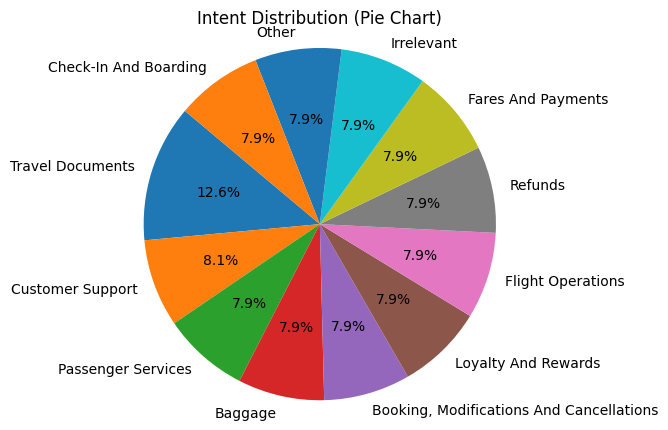

In [65]:
import matplotlib.pyplot as plt

# Check class counts
intent_counts = df['Intent'].value_counts()

# Calculate percentage distribution
intent_percent = df['Intent'].value_counts(normalize=True) * 100

# Display count and percentage together
distribution_df = pd.DataFrame({
    'Count': intent_counts,
    'Percentage': intent_percent.round(2)
})

print("📊 Intent Class Distribution:\n")
print(distribution_df)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Intent Distribution (Pie Chart)')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()

📊 Intent Class Distribution:

                                          Count  Percentage
Intent                                                     
Travel Documents                            135        8.33
Baggage                                     135        8.33
Passenger Services                          135        8.33
Booking, Modifications And Cancellations    135        8.33
Loyalty And Rewards                         135        8.33
Refunds                                     135        8.33
Flight Operations                           135        8.33
Fares And Payments                          135        8.33
Customer Support                            135        8.33
Irrelevant                                  135        8.33
Other                                       135        8.33
Check-In And Boarding                       135        8.33


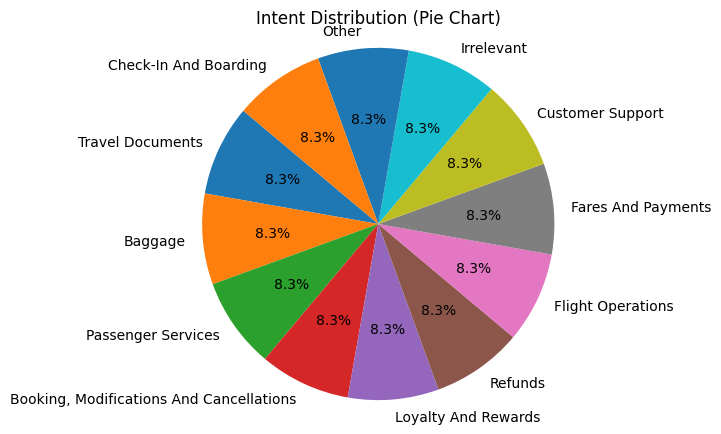

In [66]:
# Define the maximum count allowed
max_rows = 135

# List of intents to trim
intents_to_trim = ['Travel Documents', 'Customer Support']

# For each intent, check if it exceeds the limit and randomly drop extras
for intent in intents_to_trim:
    intent_df = df[df['Intent'] == intent]
    if len(intent_df) > max_rows:
        to_drop = intent_df.sample(n=(len(intent_df) - max_rows), random_state=42)
        df = df.drop(to_drop.index)

# Check class counts
intent_counts = df['Intent'].value_counts()

# Calculate percentage distribution
intent_percent = df['Intent'].value_counts(normalize=True) * 100

# Display count and percentage together
distribution_df = pd.DataFrame({
    'Count': intent_counts,
    'Percentage': intent_percent.round(2)
})

print("📊 Intent Class Distribution:\n")
print(distribution_df)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Intent Distribution (Pie Chart)')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()

In [69]:
df.to_csv("/content/Intent_Classification_Dataset.csv", index=False)

📊 Intent Class Distribution:

                                          Count  Percentage
Intent                                                     
Travel Documents                            135        8.33
Baggage                                     135        8.33
Passenger Services                          135        8.33
Booking, Modifications And Cancellations    135        8.33
Loyalty And Rewards                         135        8.33
Refunds                                     135        8.33
Flight Operations                           135        8.33
Fares And Payments                          135        8.33
Customer Support                            135        8.33
Irrelevant                                  135        8.33
Other                                       135        8.33
Check-In And Boarding                       135        8.33


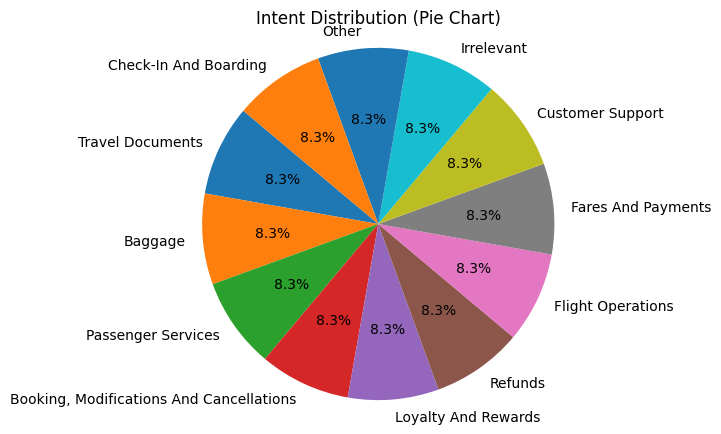

In [70]:
df = pd.read_csv("/content/Intent_Classification_Dataset.csv")

# Check class counts
intent_counts = df['Intent'].value_counts()

# Calculate percentage distribution
intent_percent = df['Intent'].value_counts(normalize=True) * 100

# Display count and percentage together
distribution_df = pd.DataFrame({
    'Count': intent_counts,
    'Percentage': intent_percent.round(2)
})

print("📊 Intent Class Distribution:\n")
print(distribution_df)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Intent Distribution (Pie Chart)')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1620 non-null   object
 1   Intent  1620 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB


Train-Validation-Test split

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df['Text']  # Features (Text)
y = df['Intent']  # Target (Intent)

# First split: 85% for training and validation (15% for test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Second split: 70% for training and 15% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42)

# Combine the features and target into DataFrames (optional)
train_df = pd.DataFrame({'Text': X_train, 'Intent': y_train})
val_df = pd.DataFrame({'Text': X_val, 'Intent': y_val})
test_df = pd.DataFrame({'Text': X_test, 'Intent': y_test})

# Display the class distribution in each set
print(f"Training set distribution:\n{y_train.value_counts()}")
print(f"Validation set distribution:\n{y_val.value_counts()}")
print(f"Test set distribution:\n{y_test.value_counts()}")


Training set distribution:
Intent
Passenger Services                          95
Booking, Modifications And Cancellations    95
Check-In And Boarding                       95
Baggage                                     95
Other                                       95
Fares And Payments                          95
Flight Operations                           94
Irrelevant                                  94
Customer Support                            94
Refunds                                     94
Loyalty And Rewards                         94
Travel Documents                            94
Name: count, dtype: int64
Validation set distribution:
Intent
Flight Operations                           21
Travel Documents                            21
Refunds                                     21
Loyalty And Rewards                         20
Passenger Services                          20
Booking, Modifications And Cancellations    20
Check-In And Boarding                       20
Fares And P

In [77]:
# Save the DataFrames to CSV files
train_df.to_csv('train_data_intent_classification.csv', index=False)
val_df.to_csv('validation_data_intent_classification.csv', index=False)
test_df.to_csv('test_data_intent_classification.csv', index=False)

print("DataFrames saved as CSV files successfully!")

DataFrames saved as CSV files successfully!


In [78]:
train_df = pd.read_csv("/content/train_data_intent_classification.csv")
val_df = pd.read_csv("/content/validation_data_intent_classification.csv")
test_df = pd.read_csv("/content/test_data_intent_classification.csv")

In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1134 non-null   object
 1   Intent  1134 non-null   object
dtypes: object(2)
memory usage: 17.8+ KB


In [80]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    243 non-null    object
 1   Intent  243 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    243 non-null    object
 1   Intent  243 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


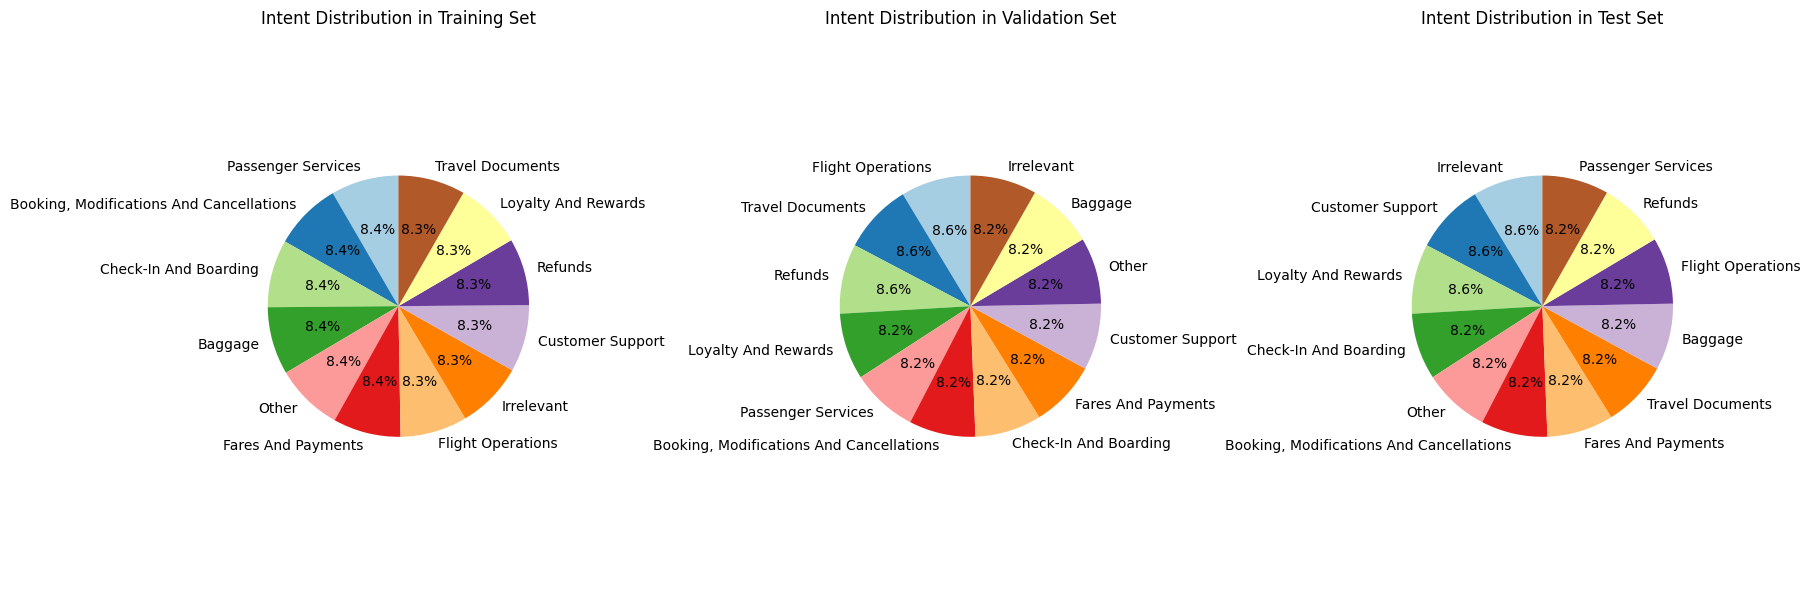

In [84]:
import matplotlib.pyplot as plt

# Function to plot pie chart for intent distribution
def plot_pie_chart(ax, df, title):
    # Count the number of occurrences of each intent
    intent_counts = df['Intent'].value_counts()

    # Plot the pie chart on the provided axis
    ax.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Create a figure with 1 row and 3 columns (subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie charts for train, validation, and test sets
plot_pie_chart(axes[0], train_df, 'Intent Distribution in Training Set')
plot_pie_chart(axes[1], val_df, 'Intent Distribution in Validation Set')
plot_pie_chart(axes[2], test_df, 'Intent Distribution in Test Set')

# Adjust layout
plt.tight_layout()
plt.show()